In [3]:
import warnings
from sys import path; path.append("../ingestion_program") # Pour l'accès à DataManager
from model import model, preprocess # Modèle avec méthodes
from data_manager import DataManager # Gestion du jeu de données
from sklearn.model_selection import train_test_split # Découpage du jeu de données

In [4]:
data_dir = '../public_data'
data_name = 'malaria'
D = DataManager(data_name, data_dir, replace_missing=True)
X_train, X_test, y_train, y_test = train_test_split(D.data['X_train'], D.data['Y_train'], test_size=0.33, random_state=42)

Info file found : /home/tp-home003/mvincen1/L2/S4/malaria/starting_kit/public_data/malaria_public.info


In [3]:
def codalab():
    """ Le code mystique de Codalab """
    
    # Instance de model
    M = model()

    # Entrainement du modèle
    M.fit(X_train, y_train)
    
    print(M) # Vérification que le model ait bien été loaded

    # Labels prédits
    y_pred = M.predict(X_test)

    # Calcul du score avec y_test les labels réels
    score = M.score(y_test, y_pred)

    # Affichage du résultat
    print("score =", score)
    
    # Matrice de confusion sur ensemble apprentissage
    print("Matrice de confusion sur ensemble apprentissage")
    M.confusion_matrix(X_train, y_train)
    
    # Matrice de confusion sur ensemble test
    print("Matrice de confusion sur ensemble test")
    M.confusion_matrix(X_test, y_test)
    
    return score

In [4]:
# Optimisation du preprocessing à ne lancer qu'une seule fois
# par son auteur (Maxime)
warnings.filterwarnings('ignore')

# Instance de model
M = model()
# Optimisation plus longue plus n_iter grand
M.optimize_preprocess(X_train, y_train, X_test, y_test, verbose=True)
# Sauvegarde du preprocess
M.save()

n_iter=1/60
n_pca=3, n_esti=3, score=0.8879654924514738
time=89 sec
n_iter=2/60
n_pca=3, n_esti=4, score=0.8966642703091301
time=203 sec
n_iter=3/60
n_pca=3, n_esti=9, score=0.9045363048166787
time=450 sec
n_iter=4/60
n_pca=1, n_esti=10, score=0.5721135873472322
time=720 sec
n_iter=5/60
n_pca=4, n_esti=5, score=0.9268871315600288
time=864 sec
n_iter=6/60
n_pca=6, n_esti=6, score=0.9368727534148094
time=1034 sec
n_iter=7/60
n_pca=6, n_esti=1, score=0.9417109992810927
time=1071 sec
n_iter=8/60
n_pca=6, n_esti=5, score=0.9417613227893601
time=1211 sec
n_iter=9/60
n_pca=2, n_esti=7, score=0.7512293314162473
time=1408 sec
n_iter=10/60
n_pca=6, n_esti=9, score=0.9318835370237238
time=1650 sec
n_iter=11/60
n_pca=1, n_esti=8, score=0.5757153127246585
time=1867 sec
n_iter=12/60
n_pca=5, n_esti=10, score=0.9120704529115743
time=2136 sec
n_iter=13/60
n_pca=4, n_esti=10, score=0.9130769230769231
time=2399 sec
n_iter=14/60
n_pca=5, n_esti=4, score=0.9164629762760603
time=2521 sec
n_iter=15/60
n_pca

In [5]:
# Optimisation des hyperparamètres à ne lancer qu'une seule fois
# par son auteur (Maxime)
warnings.filterwarnings('ignore')

# Instance de model
M = model() 
# Optimisation plus longue plus n_iter grand
M.optimize_model(X_train, y_train, n_iter=500)
# Sauvegarde du modèle
M.save()

Model reloaded from: ./_model.pickle
{'bootstrap': [True, False], 'criterion': ['gini', 'entropy'], 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, None], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2, 3, 4], 'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_s

In [6]:
# Tests automatiques de l'optimisation
warnings.filterwarnings('ignore')

# Qualité du score avec le preprocessing optimisé
M = model() # Instance
M.classifier.fit(X_train, y_train) # Entraînement sans preprocessing
simple_score = M.scoring_function(y_test, M.classifier.predict(X_test)) # Score simple
M.preprocess = model().load().preprocess # Preprocessing manuel
M.preprocess.fit(X_train) # suite du preprocessin
X, y = M.preprocess.transform(X_train, y_train) # suite du preprocessing
M.classifier.fit(X, y) # Entraînement avec preprocessing
X, _ = M.preprocess.transform(X_test, y_test, remove_outliers = False)
optimization_score = M.scoring_function(y_test, M.classifier.predict(X)) # Score optimisé
print(simple_score, optimization_score)
assert(simple_score <= optimization_score) # Le score optimisé doit être supérieur

Model reloaded from: ./_model.pickle
0.954155283968368 0.9414306254493171


AssertionError: 

<div style="background:#FFFFAA">
    <p>
        L'erreur ci-dessous est une erreur de test unitaire qui signifie que le score obtenu par le model après l'optimisation du preprocessing est moins bon que sans preprocessing. C'est un vrai problème qui pose question sur la méthode de preprocessing utilisé. L'optimisation a permis de déterminer les meilleurs paramètres pour réaliser le preprocessing. Mais malgré tout, on perd en qualité de score. Peut-être cependant, gagne-t-on en temps d'exécution par rapport à un jeu de données non-préprocessé ? À vérifier...
    </p>
</div>

In [5]:
# Tests automatiques de l'optimisation
warnings.filterwarnings('ignore')

# Qualité du score avec les hyperparamètres optimisés
M = model() # Instance
M.preprocess =  model().load().preprocess # Preprocessing manuel
M.preprocess.fit(X_train)
X, y = M.preprocess.transform(X_train, y_train) # suite du preprocessing
M.classifier.fit(X, y) # Juste pour le test
X, _ = M.preprocess.transform(X_test, y_test, remove_outliers = False)
simple_score = M.score(y_test, M.classifier.predict(X)) # Score sans optimisation
M.fit(X_train, y_train) # Entrainement avec optimisation
optimization_score = M.score(y_test, M.predict(X_test)) # Score avec optimisation
print(simple_score, optimization_score)
assert(simple_score <= optimization_score) # Le score optimisé doit être supérieur

Model reloaded from: ./_model.pickle
Model reloaded from: ./_model.pickle
time=110 sec
0.933803019410496 0.9360963335729692


<div style="background:#FFFFAA">
    <p>
        Ici, on ne rencontre pas d'erreur. Ce qui signifie que l'optimisation des hyperparamètres est vraiment utile. Cependant, c'est une contribution relativement faible qui ajoute de l'ordre de quelques millièmes de points au score. C'est toujours ça de gagné !
    </p>
</div>

In [12]:
# Tests automatiques de l'optimisation
warnings.filterwarnings('ignore')

# Concordance des paramètres
params = M.get_params() # Paramètres effectifs
# Paramètres testés
tested_params={'bootstrap':[True,False],
               'criterion':["gini", "entropy"], 
               'n_estimators':[i for i in range(10,300,10)], 
               'max_depth':[i for i in range(1,10)]+[None], 
               'min_samples_split':[i for i in range(2,5)], 
               'min_samples_leaf':[i for i in range(1,5)],
               'random_state':[i for i in range(1,100)]}

for tp in tested_params.keys():
    print("classifier__"+tp, "=", params["classifier__" + tp])
    assert(params["classifier__" + tp] in tested_params[tp])

classifier__bootstrap = True
classifier__criterion = gini
classifier__n_estimators = 10
classifier__max_depth = None
classifier__min_samples_split = 2
classifier__min_samples_leaf = 1
classifier__random_state = None


AssertionError: 

<div style="background:#FFFFAA">
    <p>
       Cette erreur laisse penser qu'il y a eu un problème au niveau de l'enregistrement ou du chargement du model après l'optimisation de ses hyperparamètres. Il semblerait que le pickle ne fonctionne pas. Ce qui expliquerait bien des choses... En réalité, le modèle qu'on a sous les yeux n'est autre que le modèle par défaut...
    </p>
</div>

In [19]:
M = model()
params1 = M.get_params()
print(params1)
M.load()
params2 = M.get_params()
print(params1)
assert(params1 != params2)

{'classifier__bootstrap': True, 'classifier__class_weight': None, 'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__max_features': 'auto', 'classifier__max_leaf_nodes': None, 'classifier__min_impurity_decrease': 0.0, 'classifier__min_impurity_split': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__min_weight_fraction_leaf': 0.0, 'classifier__n_estimators': 10, 'classifier__n_jobs': None, 'classifier__oob_score': False, 'classifier__random_state': None, 'classifier__verbose': 0, 'classifier__warm_start': False, 'classifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
       

AssertionError: 

<div style="background:#FFFFAA">
    <p>
       Le problème se confirme pour de bon... Nous travaillerons à résoudre ce problème pour la prochaine fois.
    </p>
</div>

Model reloaded from: ./_model.pickle
time=110 sec
model(classifier=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))
score = 0.9349532710280374
Matrice de confusion sur ensemble apprentissage


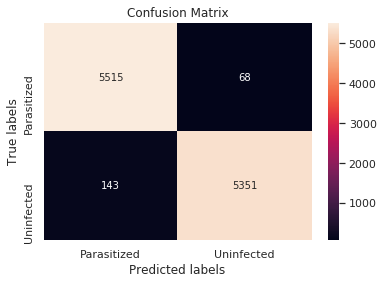

Matrice de confusion sur ensemble test


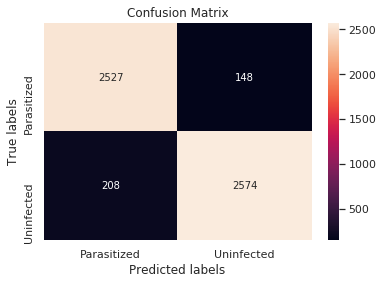

0.9349532710280374

In [4]:
warnings.filterwarnings('ignore')
codalab()